### Exploratory Data Analysis and Visualization:

this notebook is walking through the opearation of exploratory data analysis and visualization.

original csv file can be found on https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

In [3]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.shape

(23486, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


###### Let's remove the columns (axis = 0) with missing values.

In [7]:
df_drop = df.dropna(axis=0, how='any')

In [8]:
df_drop.shape

(19662, 10)

###### Let's see the number of reviews by age

In [9]:
# review = df_drop[['Age', 'Rating', 'Recommended IND', 'Title', 'Review Text']]

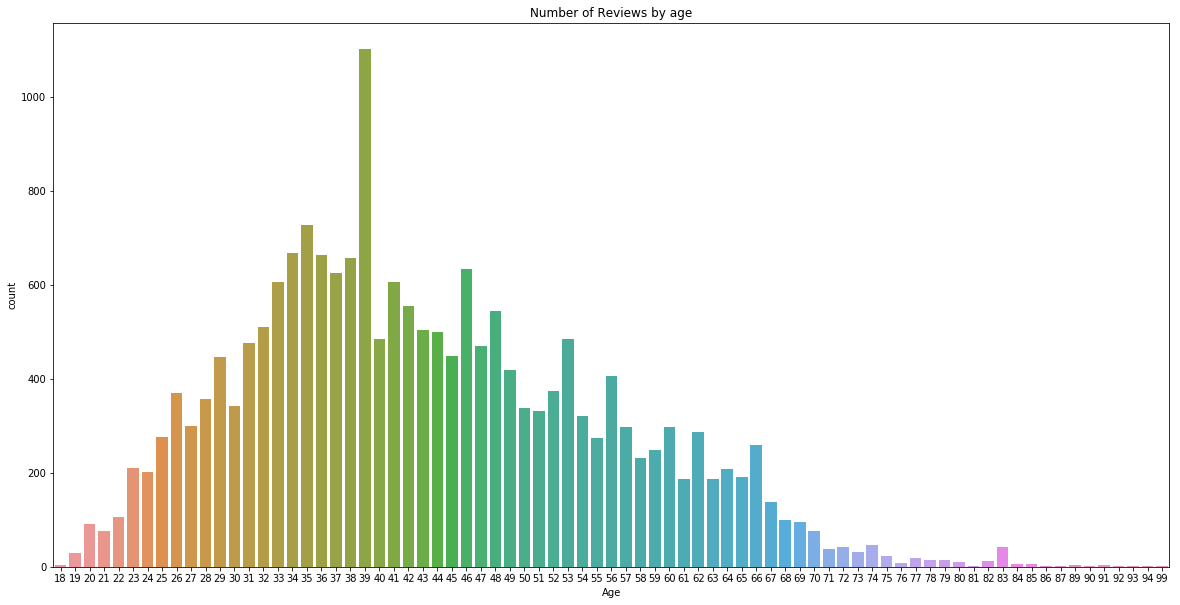

In [10]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Age', data = df_drop)

plt.xticks(rotation = 1)
plt.title('Number of Reviews by age')
plt.show()

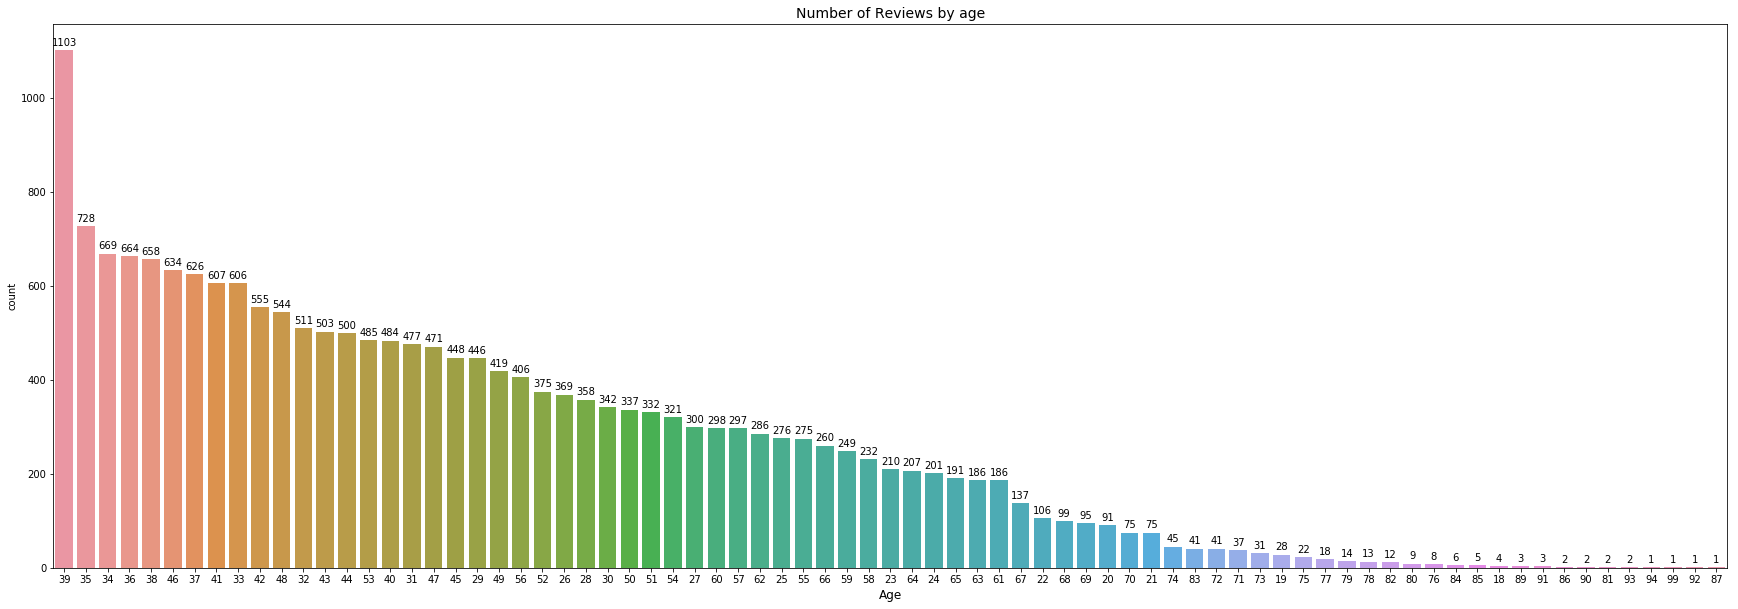

In [11]:
# sort and add number labels
plt.figure(figsize= (30,10))
ax = sns.countplot(x='Age', data=df_drop, order = df_drop['Age'].value_counts().index
                )
ax.set_title('Number of Reviews by age', fontsize=14)
ax.set_xlabel('Age', fontsize=12)

x = df_drop['Age'].value_counts()

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

In [12]:
count_reviewer = df_drop['Age'].value_counts()

print(count_reviewer.idxmax(), 'is the age group who wrote the most reviews with', count_reviewer.max(), 'reviews')
print(count_reviewer.idxmin(), 'is the age group who wrote the least reviews with', count_reviewer.min(), 'reviews')

39 is the age group who wrote the most reviews with 1103 reviews
94 is the age group who wrote the least reviews with 1 reviews


##### Let's see the numbers od reviews by the division and depertment.

Text(0.5,1,'Reviews in each Division')

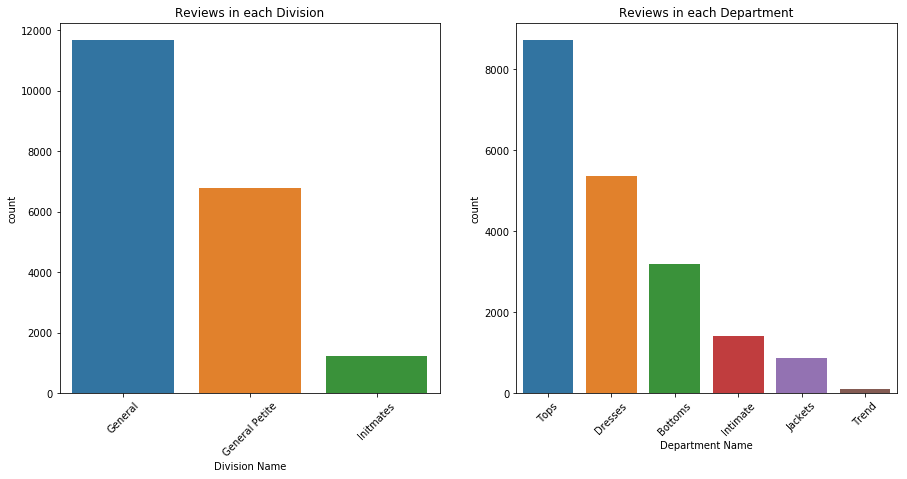

In [13]:
plt.figure(figsize=(15, 15))

plt.subplot2grid((2, 2), (0, 1))
plt.xticks(rotation=45)
sns.countplot(df_drop['Department Name'], 
                    order = df_drop['Department Name'].value_counts().index)
plt.title('Reviews in each Department')


plt.subplot2grid((2, 2), (0, 0))
plt.xticks(rotation=45)
sns.countplot(df_drop['Division Name'],
                   order = df_drop['Division Name'].value_counts().index)
plt.title('Reviews in each Division')

##### Let's see the distribution of rating by the department.

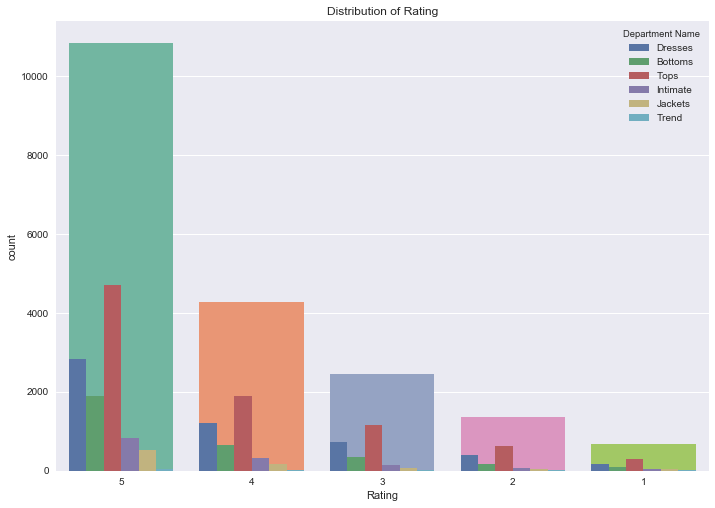

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(x = 'Rating', data = df_drop, palette='Set2',
             order = df_drop['Rating'].value_counts().index)

sns.countplot(x = 'Rating', hue='Department Name', data = df_drop,
             order = df_drop['Rating'].value_counts().index)

plt.title('Distribution of Rating')
plt.show()

##### Let's see the distribution of rating by the class.

Text(0.5,1,'Reviews in each class')

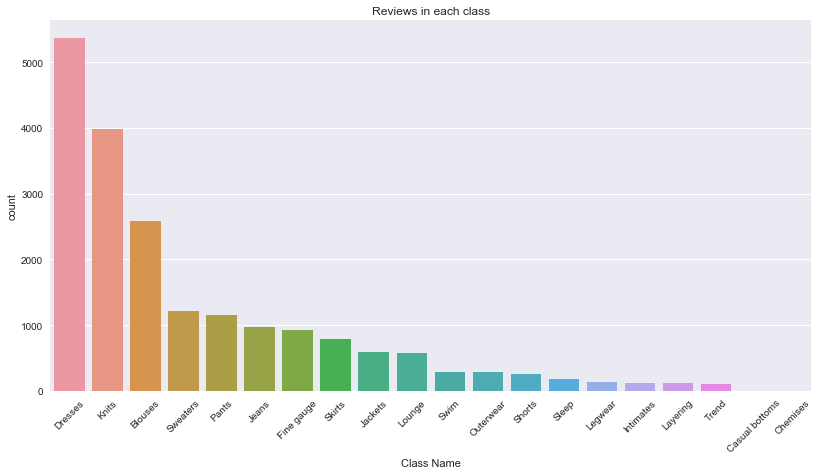

In [15]:
plt.figure(figsize=(30, 15))
plt.subplot2grid((2, 2), (1, 0))
plt.xticks(rotation=45)
sns.countplot(df_drop['Class Name'],
                   order = df_drop['Class Name'].value_counts().index)
plt.title('Reviews in each class')

###### Let's check the popular items.

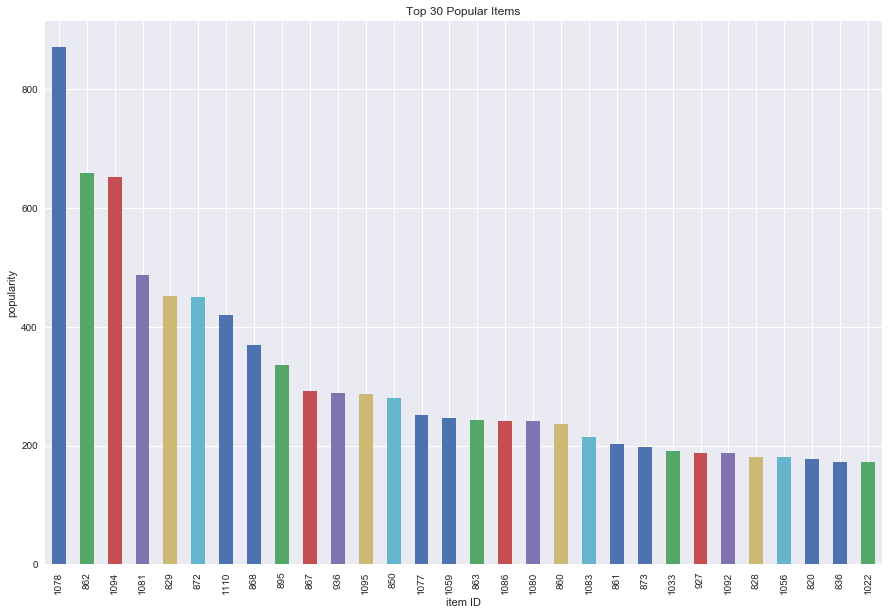

In [16]:
plt.figure(figsize=(15, 10))
plt.xlabel('item ID')
plt.ylabel('popularity')
plt.title('Top 30 Popular Items')
df_drop['Clothing ID'].value_counts()[:30].plot(kind='bar')

###### Let's check the numbers of recommendations.

In [17]:
recommended = df_drop[df_drop['Recommended IND']==1]
not_recommended = df_drop[df_drop['Recommended IND']==0]

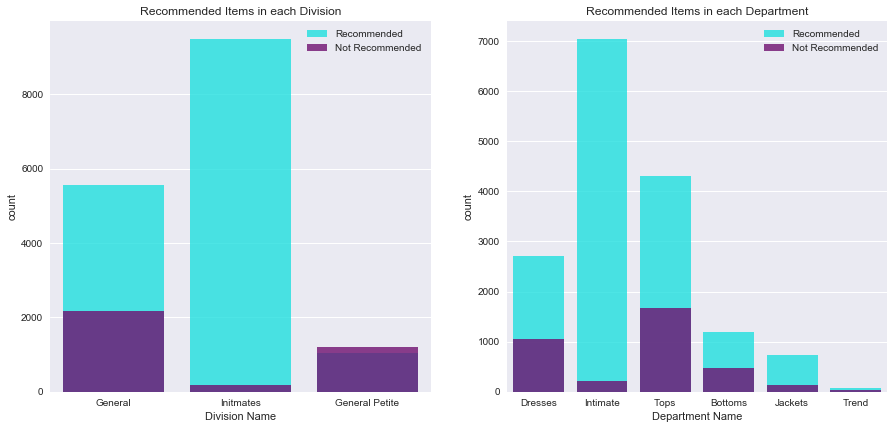

In [18]:
plt.figure(figsize=(15, 15))

plt.subplot2grid((2, 2), (0, 0))
sns.countplot(recommended['Division Name'], color = "cyan", alpha = 0.8, label = 'Recommended')
sns.countplot(not_recommended['Division Name'], color = "purple", alpha = 0.8, label = 'Not Recommended')
plt.title('Recommended Items in each Division')
plt.legend()

plt.subplot2grid((2, 2), (0, 1))
sns.countplot(recommended['Department Name'], color="cyan", alpha = 0.8, label = 'Recommended')
sns.countplot(not_recommended['Department Name'], color="purple", alpha = 0.8, label = 'Not Recommended')
plt.title('Recommended Items in each Department')
plt.legend()

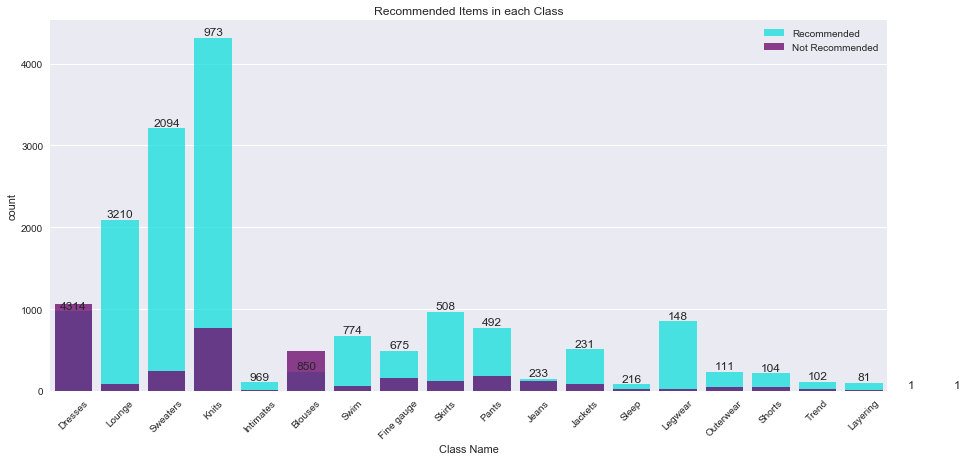

In [19]:
plt.figure(figsize=(15, 15))

plt.subplot2grid((2, 2), (1, 0), colspan=2)
plt.xticks(rotation=45)
a = sns.countplot(recommended['Class Name'], color="cyan", alpha = 0.8, label = 'Recommended')
sns.countplot(not_recommended['Class Name'], color="purple", alpha = 0.8, label = 'Not Recommended')
plt.title('Recommended Items in each Class')
plt.legend()



#let's add numbers to the graph (only for 'Recommended')
x = recommended['Class Name'].value_counts()
rects = a.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    a.text(rect.get_x() + rect.get_width()/2, height + 8, label, ha='center', va='bottom')


## Cleaning text data


Texts which are irrelevant to the context of the data and the end-output can be regarded as noise data.


For example – language stopwords (commonly used words of a language – I, you, is, am, the, of, in etc), URLs or links, punctuations. 

This step deals with removal of all types of stopwords in the text.

In [20]:
import nltk
from nltk.corpus import stopwords
import re

In [21]:
# firstly, we concatenate all review text in to a string and also lower all of them. They are separated by ' '
all_words = df_drop['Review Text'].str.lower().str.cat(sep = ' ')

# removes punctuation, numbers and returns list of words
all_words = re.sub('[^A-Za-z]+', ' ', all_words)

# remove all stopwords and numeric from the text
stop_words = set(stopwords.words('english'))
tokenized_words = nltk.word_tokenize(all_words)
no_stop_words = []
for w in tokenized_words:
    if (w not in stop_words) and (w.isdigit() is False):
        no_stop_words.append(w)

### Let's count the word frequency in the review comments.

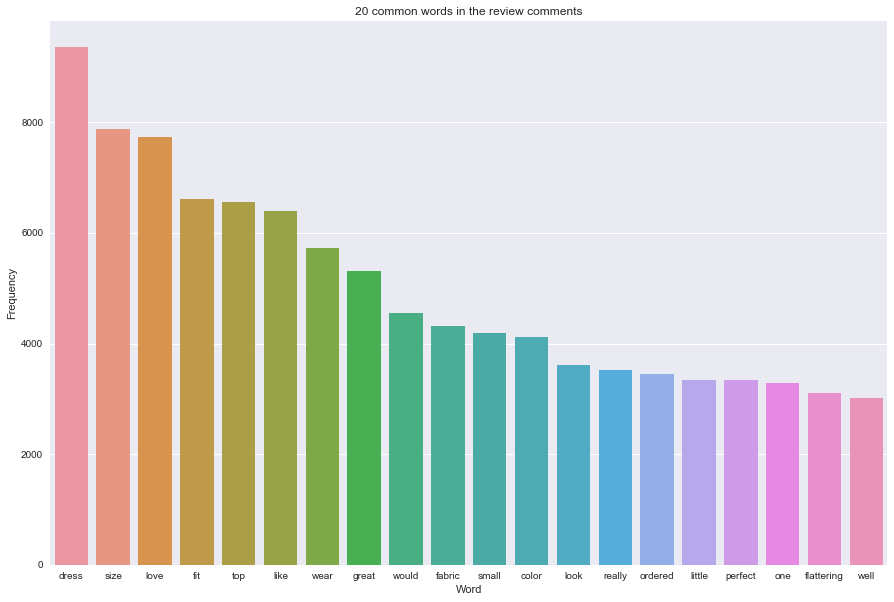

In [22]:
word_list = nltk.FreqDist(no_stop_words)
word_df = pd.DataFrame(word_list.most_common(100), columns=['Word', 'Frequency'])

plt.figure(figsize = (15, 10))
a = sns.barplot(x = 'Word', y = 'Frequency', data = word_df[:20])
plt.title('20 common words in the review comments')

plt.show()

In [23]:
word_list

FreqDist({'dress': 9359, 'size': 7872, 'love': 7728, 'fit': 6608, 'top': 6561, 'like': 6393, 'wear': 5722, 'great': 5306, 'would': 4558, 'fabric': 4316, ...})

###### Try another approach to text cleaning

In [24]:
from sklearn.feature_extraction import text

In [25]:
# Import scikit-learn's list of stopwords and then appending with my own words 
stop = text.ENGLISH_STOP_WORDS

# Basic text cleaning function
def remove_noise(text):
    
    # Make lowercase
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    # Remove whitespaces
    text = text.apply(lambda x: " ".join(x.strip() for x in x.split()))
    
    # Remove special characters
    text = text.apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    
    # Remove punctuation
    text = text.str.replace('[^\w\s]', '')
    
    # Remove numbers
    text = text.str.replace('\d+', '')
    
    # Remove Stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    # Convert to string
    text = text.astype(str)
        
    return text

In [26]:
d = df_drop['Review Text'].copy()

In [27]:
# Applying noise removal function to data
# review['Cleaned Review Text'] = remove_noise(d)
# review.head()